# Exploring Dandiset 001375: Septum GABA disruption with DREADDs

**AI-Generated Notebook Notice:**  
This notebook was automatically generated by AI and has *not* been fully verified.  
Please use caution when interpreting code or results. Errors or misinterpretations may be present.

**Overview**:  
This notebook provides an interactive exploration of [Dandiset 001375 version 0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855):  
**"Septum GABA disruption with DREADDs"**  

- **Description:**  
  Pilot study on the effect of disrupting septal GABAergic activity using DREADDs on hippocampal and neocortical activity, recorded via multichannel extracellular electrodes in mouse.  
- **Citation:**  
  Eckert, Michael; McNaughton, Bruce; Ferbinteanu, Janina (2025). [DOI](https://doi.org/10.48324/dandi.001375/0.250406.1855)
- **Contributors:**  
  Michael Eckert, Bruce McNaughton, Janina Ferbinteanu, NIH Brain
- **License:** CC-BY-4.0

---

## What this notebook covers

1. **Overview of the Dandiset and its NWB assets**
2. **How to access and load an NWB file remotely**
3. **Exploring session, subject, and experiment structure**
4. **Viewing raw extracellular signals and spike timing**
5. **Directions for further analysis**

> You can also view this Dandiset online: [https://dandiarchive.org/dandiset/001375/0.250406.1855](https://dandiarchive.org/dandiset/001375/0.250406.1855)

## Required Packages

The following Python packages are required to run this notebook:  
- dandi
- pynwb
- remfile
- h5py
- numpy
- pandas
- matplotlib

These are assumed to be installed in your environment.

In [1]:
# Set up imports for the notebook
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Access Dandiset 001375 using the DANDI API

First, we connect to the DANDI archive and fetch basic information about the Dandiset and list a few assets.

In [2]:
# Connect to DANDI archive and access Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001375", "0.250406.1855")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', '[none]')}")
print(f"Contributors: {metadata.get('contributor', [])}")
print(f"License: {metadata.get('license', [])}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855
Description: Pilot study of the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity
Contributors: [{'name': 'Eckert, Michael', 'email': 'meckert1@uci.edu', 'roleName': ['dcite:ContactPerson'], 'schemaKey': 'Person', 'affiliation': [], 'includeInCitation': True}, {'name': 'NIH Brain', 'roleName': ['dcite:Funder'], 'schemaKey': 'Organization', 'identifier': 'https://ror.org/05h1kgg64', 'awardNumber': 'NS121764', 'includeInCitation': False}, {'name': 'McNaughton, Bruce', 'email': 'brucemcn@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}, {'name': 'Ferbinteanu, Janina', 'email': 'janina.ferbinteanu@uci.edu', 'roleName': ['dcite:Author'], 'schemaKey': 'Person', 'includeInCitation': True}]
License: ['spdx:CC-BY-4.0']

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.n

## Summarizing available NWB files

For illustration, we focus on a single NWB file:

```
sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
```
[Neurosift: visualize this file](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/&dandisetId=001375&dandisetVersion=draft)

**Experimental context:**  
In this experiment, a chemogenetic technique (DREADD—Designer Receptors Exclusively Activated by Designer Drugs) was used to suppress GABAergic (inhibitory) neurons specifically in the medial septum of the mouse brain. This manipulation is expected to influence neural activity in downstream regions like the hippocampus and neocortex.  
The "trials" in this dataset likely represent individual laps or runs performed by the mouse, aligning with behavioral events.

Asset ID: `ce525828-8534-4b56-9e47-d2a34d1aa897`

We will load and analyze this file using the remote URL:
```
https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/
```

## Load NWB file and survey its structure

We use PyNWB and remfile to stream the file from the DANDI API without downloading.  
The NWB (Neurodata Without Borders) standard organizes neurophysiology data in a hierarchical file structure. Main components and their relationships are outlined below.

In [3]:
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Session and subject info
print("# Session Info")
print("Identifier:", nwb.identifier)
print("Session description:", nwb.session_description)
print("Session start:", nwb.session_start_time)
print("Subject ID:", getattr(nwb.subject, 'subject_id', None))
print("Subject species:", getattr(nwb.subject, 'species', None))
print("Subject sex:", getattr(nwb.subject, 'sex', None))
print("Subject age:", getattr(nwb.subject, 'age', None))
print("Subject description:", getattr(nwb.subject, 'description', None))
# Note: "medial septum DREADD to suppress GABA interneurons" indicates that the experiment suppressed a specific inhibitory neuron population in the septum, affecting downstream circuits.

# Acquisition time series (main voltage recordings)
ts = nwb.acquisition.get("time_series")
print("\n# Main Acquisition TimeSeries:")
print("  shape:", ts.data.shape, "dtype:", ts.data.dtype)
print("  starting_time:", ts.starting_time, "rate:", ts.rate, "unit:", ts.unit)

# Electrodes table (electrode/channel metadata)
df_elec = nwb.electrodes.to_dataframe()
print("\n# Electrodes Table")
print("  Columns:", df_elec.columns.tolist())
print("  N electrodes:", df_elec.shape[0])
print("  Groups:", df_elec['group_name'].value_counts().to_dict())

# Trials table (behavioral trial/lap events)
df_trials = nwb.trials.to_dataframe()
print("\n# Trials Table")
print("  N trials:", df_trials.shape[0])
print("  Example rows:\n", df_trials.head())

# Units table (sorted single-unit spike times)
df_units = nwb.units.to_dataframe()
print("\n# Units Table")
print("  N units:", df_units.shape[0])
print("  Example spike_counts for first 5 units:", [len(df_units.iloc[i]['spike_times']) for i in range(min(5, len(df_units))) if isinstance(df_units.iloc[i]['spike_times'], (list, np.ndarray))])

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


# Session Info
Identifier: MS13B
Session description: mouse running laps in virtual hallway
Session start: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Subject species: Mus musculus
Subject sex: M
Subject age: P90D
Subject description: medial septum DREADD to suppress GABA interneurons

# Main Acquisition TimeSeries:
  shape: (144675584, 256) dtype: int16
  starting_time: 0.0 rate: 30000.0 unit: mV

# Electrodes Table
  Columns: ['x', 'y', 'location', 'filtering', 'group', 'group_name', 'label']
  N electrodes: 256
  Groups: {'shank1': 128, 'shank2': 128}

# Trials Table
  N trials: 387
  Example rows:
     start_time  stop_time
id                       
0     4.323800  16.929833
1    16.963067  28.414333
2    28.447100  39.402833
3    39.435833  50.027033
4    50.059667  63.064467



# Units Table
  N units: 33
  Example spike_counts for first 5 units: [18960, 100435, 278061, 36265, 39735]


### Main structures in this NWB file

**NWB File Structure Overview:**  
NWB organizes data hierarchically. Key relationships in this file:

- `acquisition/time_series`: raw extracellular signals (main voltage signals); shape is (samples, channels)
- `electrodes` table: describes properties and locations of each physical channel
- `units` table: stores spike trains for sorted neurons (units), referencing spike times
- `trials` table: behavioral epochs such as laps/runs (start/stop times)
- `subject`: experiment subject metadata (species, age, interventions)

| Structure          | Description                                                  | Size / Content            |
|--------------------|-------------------------------------------------------------|---------------------------|
| acquisition/time_series | Raw extracellular voltage traces                    | (144,675,584, 256) int16  |
| electrodes         | Metadata for 256 electrodes                                 | Table: (256, x7 cols)     |
| trials             | Start/stop time for laps/trials (behavior)                  | 387 laps                  |
| units              | Sorted spike trains (times per unit)                        | 33 units                  |
| subject            | Mouse info (ID, species, age, DREADD, etc)                  | MS13B, M, P90D            |

## Visualization: Raw extracellular voltage traces

Let's plot a snippet (first 1 s) of the raw voltage from the first 4 channels.  
**Note:** Only a small segment is loaded, for illustration. All signals are in millivolts (mV).

_Performance tip:_ For large NWB datasets, stream only windows or subsets of the data to avoid loading all samples into memory.

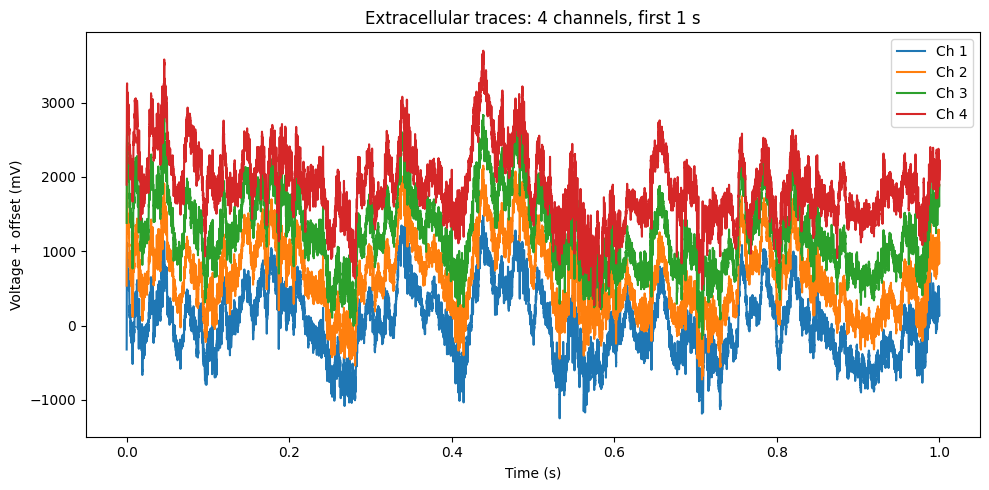

In [4]:
# Plot raw data snippet for 4 channels, 1 s, with offsets
rate = ts.rate  # 30000 Hz
n_channels = 4
duration_s = 1.0
n_samples = int(rate * duration_s)
# Only loading a submatrix to avoid memory overflow
data = ts.data[:n_samples, :n_channels] * ts.conversion  # shape (n_samples, n_channels)

plt.figure(figsize=(10, 5))
spacing = 600
for ch in range(n_channels):
    # Each trace is vertically offset for clarity
    plt.plot(np.arange(n_samples) / rate, data[:, ch] + ch * spacing, label=f'Ch {ch+1}')
plt.xlabel('Time (s)')
plt.ylabel('Voltage + offset (mV)')
plt.title('Extracellular traces: 4 channels, first 1 s')
plt.legend()
plt.tight_layout()
plt.show()

**Interpretation:**  
The traces above show typical neural voltage fluctuations. Individual action potentials (spikes) may not be visually prominent at this scale, but the variability and baseline noise are plausible for extracellular hippocampal data.

## Visualization: Spike times for sorted units

Here we plot a raster (spike times per unit) for the first 5 units, for spike times less than 30 s.
_This highlights variation in spike activity._

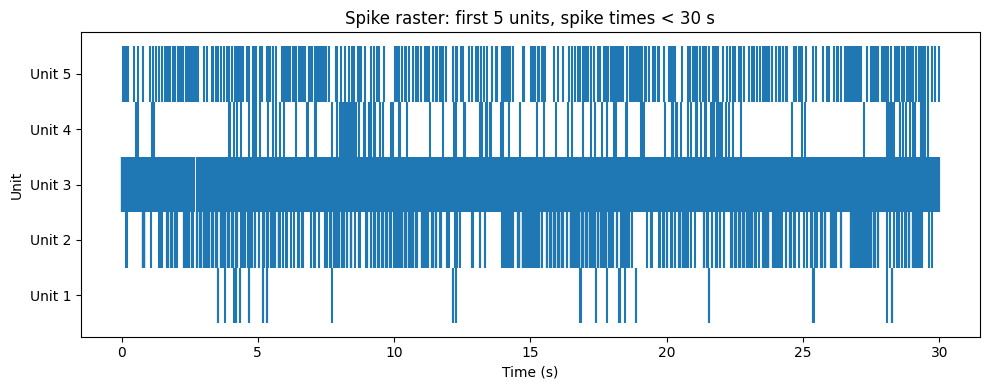

In [5]:
df_units = nwb.units.to_dataframe()
unit_ids = df_units.index[:5]
plt.figure(figsize=(10, 4))
for i, unit_id in enumerate(unit_ids):
    spike_times = df_units.loc[unit_id, 'spike_times']
    # Only include spikes within the first 30 seconds for illustration
    spike_times = [t for t in spike_times if t < 30.0]
    # Draw spike events as vertical lines for each unit (row in the plot)
    plt.vlines(spike_times, i + 0.5, i + 1.5)
plt.yticks(range(1, 6), [f'Unit {x}' for x in unit_ids])
plt.xlabel('Time (s)')
plt.ylabel('Unit')
plt.title('Spike raster: first 5 units, spike times < 30 s')
plt.tight_layout()
plt.show()

**Interpretation:**  
Each row corresponds to a different sorted unit (putative neuron). Vertical lines show spike times.  
Notice that some units (e.g., Unit 3) are much more active, so spike times can visually merge—when spike events are dense, the raster may look saturated and not all individual spikes are distinguishable.  
This plot provides a quick overview of spike train patterns for a handful of units.

## Where to go from here

- Explore across sessions and NWB files in this Dandiset.
- Analyze patterns in spikes or local field potentials (LFPs) over trials or behavioral epochs.
- Investigate trial start/stop times, align neural activity to trial events.
- Map units and channels to anatomical location using the electrodes table.
- Download NWB files for more in-depth analysis using local tools.
- Try further visualization: peristimulus histograms, mean firing rates, cross-correlations, spectral analyses, etc.

> This notebook covers only a subset of the data and provides an overview for quickly getting started.

---

For questions or assistance, refer to the official DANDI Archive documentation or see [https://dandiarchive.org](https://dandiarchive.org).